In [8]:
import numpy as np
import pandas as pd
df=pd.read_csv('C:\\Users\\SMaruthiSrinivasInte\\Documents\\Ml & AI Study\\DS\\kc_house_data.csv')

In [9]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
corr_matrix = df.corr()
#print(corr_matrix["price"].sort_values(ascending=False))
arr=corr_matrix["price"].sort_values(ascending=False)
print(arr)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


In [11]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [12]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [13]:
# sqft_living      0.702035
# grade            0.667434
# sqft_above       0.605567
# sqft_living15    0.585379
# bathrooms        0.525138
# view             0.397293
# sqft_basement    0.323816
# bedrooms         0.308350
# lat              0.307003
# waterfront       0.266369
# floors           0.256794
# yr_renovated     0.126434

In [14]:
cols=['sqft_living','grade','sqft_above','sqft_living15','bathrooms','view','sqft_basement','bedrooms','waterfront','floors','yr_renovated']

In [15]:
X=df[cols]
y=df['price']

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=0)


In [17]:
from sklearn import linear_model, metrics 
import seaborn as sn
import matplotlib.pyplot as plt

In [18]:
reg=linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [19]:
print('Variance score: {}'.format(reg.score(X_test, y_test))) 

Variance score: 0.582845477936763


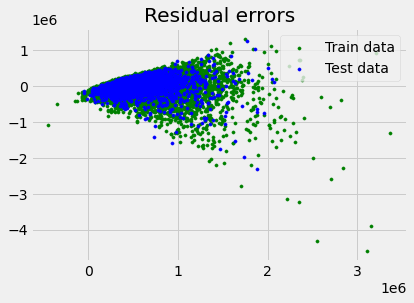

In [20]:
plt.style.use('fivethirtyeight') 
  
## plotting residual errors in training data 
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, 
            color = "green", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, 
            color = "blue", s = 10, label = 'Test data') 
  
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show() 

In [21]:
from sklearn.metrics import r2_score
r2_score(y_test, reg.predict(X_test))

0.582845477936763

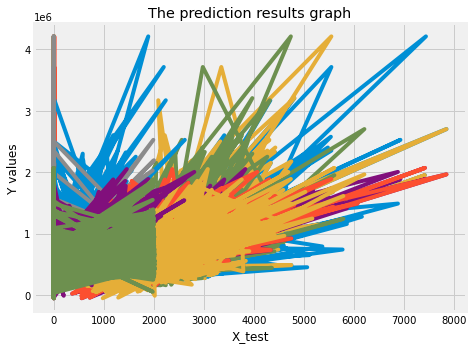

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
y1=y_test
y2=reg.predict(X_test)
x=X_test
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
l1=ax.plot(x,y1)
l2=ax.plot(x,y2)
plt.title("The prediction results graph")
plt.xlabel('X_test')
plt.ylabel('Y values')
plt.show()